In [16]:
import urllib.request

url1 = "https://github.com/ladofa/edu/raw/master/samples/sudoku.png"
url2 = "https://github.com/ladofa/edu/raw/master/samples/seven.png"

urllib.request.urlretrieve(url1, "sudoku.png")
urllib.request.urlretrieve(url2, "seven.png")

print("다운로드 완료")

다운로드 완료


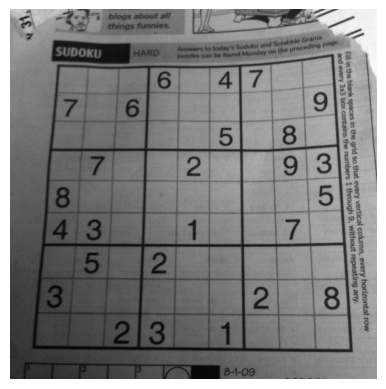

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('sudoku.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(src, cmap = 'gray')
plt.axis("off")
plt.show()

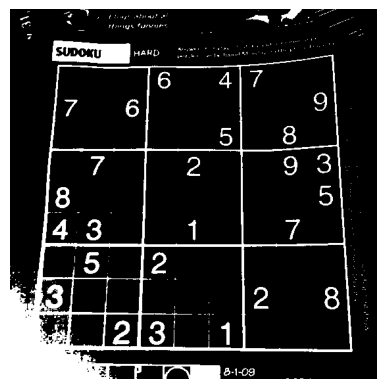

In [57]:
src2 = np.uint8(src < 60) * 255

plt.imshow(src2, cmap='gray')
plt.axis("off")
plt.show()

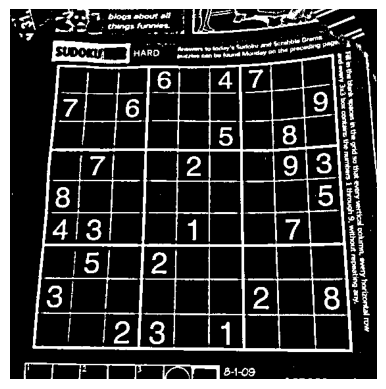

In [58]:
src3 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 15, +10)

plt.imshow(src3, cmap='gray')
plt.axis("off")
plt.show()

In [59]:
#colab

#cv2_imshow(src3)
#back = cv2.dilate(src, np.ones((3, 3), np.uint8), iterations=6)
#back = cv2.erode(back, np.ones((3, 3), np.uint8), iterations=6)
#cv2_imshow(back)

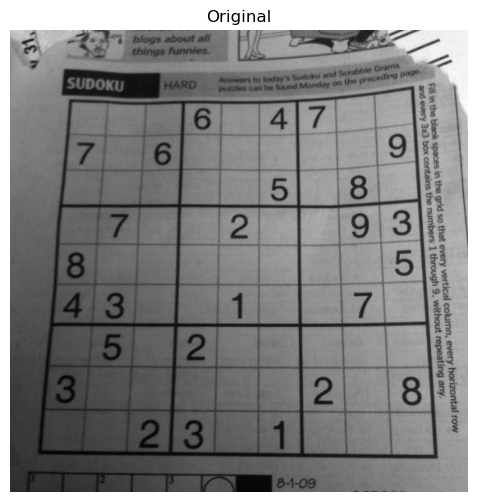

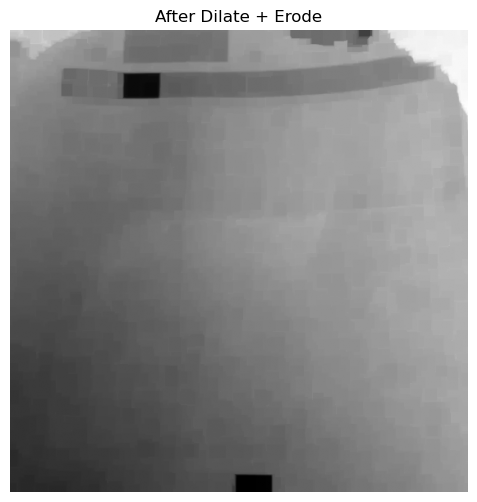

In [60]:
plt.figure(figsize=(6,6))
plt.imshow(src, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.show()

kernel = np.ones((3, 3), np.uint8)
back = cv2.dilate(src, kernel, iterations=6)
back = cv2.erode(back, kernel, iterations=6)

plt.figure(figsize=(6,6))
plt.imshow(back, cmap='gray')
plt.title("After Dilate + Erode")
plt.axis("off")
plt.show()

In [22]:
#colab

#back = cv2.dilate(src, np.ones((3, 3), np.uint8), iterations=6)
#back = cv2.erode(back, np.ones((3, 3), np.uint8), iterations=6)
#fore = cv2.absdiff(back, src) #absolute difference
# fore = np.abs(back.astype(np.int32)-src.astype(np.int32)).astype(np.uint8)
#cv2_imshow(back)
#cv2_imshow(fore)
# np.uint8(fore > 15) * 255
#_, bin = cv2.threshold(fore, 15, 255, cv2.THRESH_BINARY)
#cv2_imshow(bin)

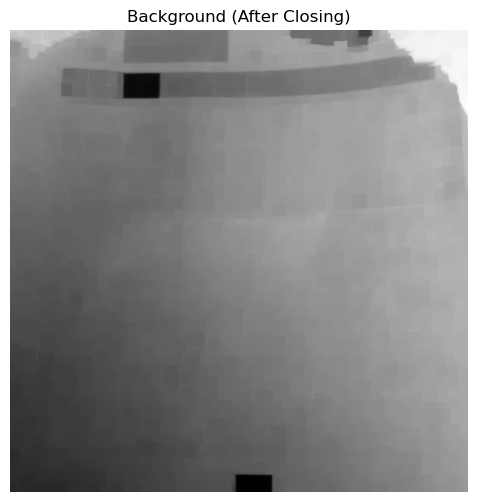

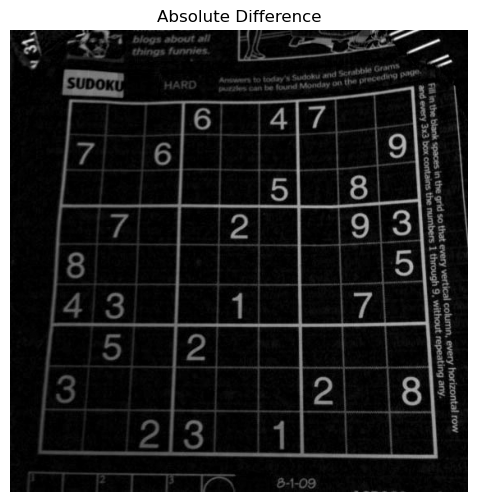

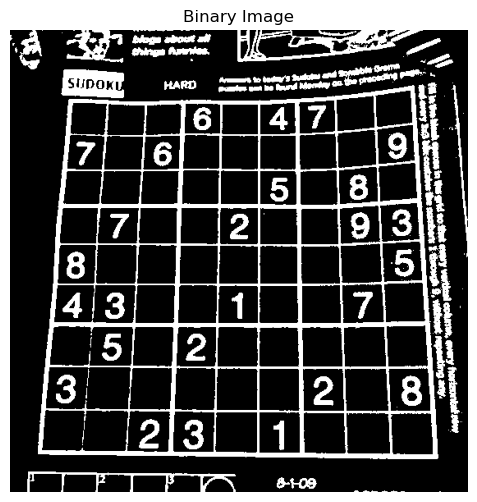

In [61]:
kernel = np.ones((3, 3), np.uint8)

back = cv2.dilate(src, kernel, iterations=6)
back = cv2.erode(back, kernel, iterations=6)

# 배경과 원본 차이
fore = cv2.absdiff(back, src)

# Threshold
_, binary = cv2.threshold(fore, 15, 255, cv2.THRESH_BINARY)


# 1️⃣ Background 출력
plt.figure(figsize=(6,6))
plt.imshow(back, cmap='gray')
plt.title("Background (After Closing)")
plt.axis("off")
plt.show()

# 2️⃣ Difference 출력
plt.figure(figsize=(6,6))
plt.imshow(fore, cmap='gray')
plt.title("Absolute Difference")
plt.axis("off")
plt.show()

# 3️⃣ Binary 출력
plt.figure(figsize=(6,6))
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()

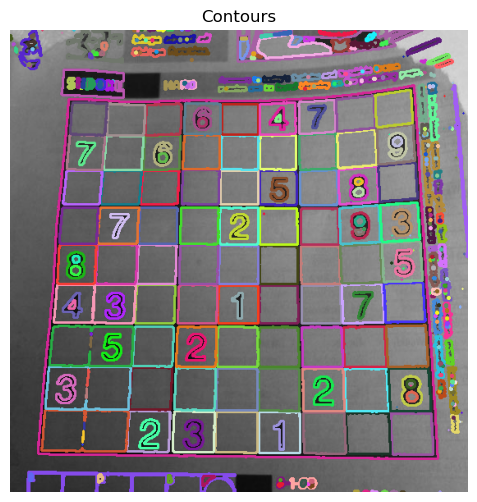

In [62]:
# grayscale → 3채널로 변환 (컬러 contour 그리기용)
dst = np.repeat(src[..., None], 3, axis=2)

# contour 찾기
contours, hierarchy = cv2.findContours(binary, 
                                       cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_SIMPLE)

# 각 contour에 랜덤 색으로 그리기
for i in range(len(contours)):
    color = np.random.randint(20, 255, size=3).tolist()
    cv2.drawContours(dst, contours, i, color, thickness=2)
    

dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dst_rgb)
plt.title("Contours")
plt.axis("off")
plt.show()

In [63]:
test = np.array([[0, 0], [10, 50], [0, 100], [100, 100], [100, 0]])
cv2.arcLength(test, True)
cv2.contourArea(test)
cv2.approxPolyDP(test, 9, True)

array([[[  0,   0]],

       [[ 10,  50]],

       [[  0, 100]],

       [[100, 100]],

       [[100,   0]]], dtype=int32)

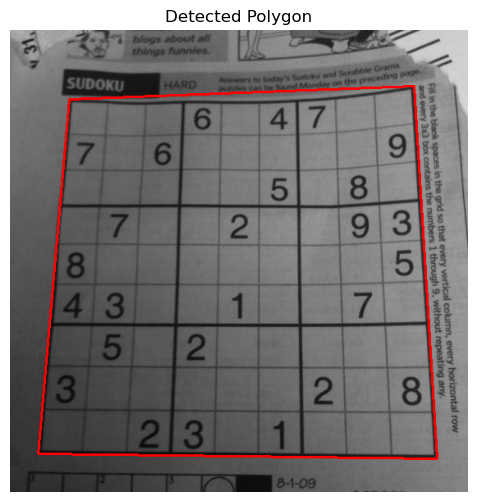

In [64]:
contours, hierarchy = cv2.findContours(binary, 
                                       cv2.RETR_TREE, 
                                       cv2.CHAIN_APPROX_SIMPLE)

hierarchy = hierarchy[0]

# 각 contour 둘레 계산
lengthes = [cv2.arcLength(con, True) for con in contours]

# 가장 긴 contour 선택
maxLen = np.max(lengthes)
maxIndex = np.argmax(lengthes)
maxCon = contours[maxIndex]

# 다각형 근사 (보통 2% 사용)
out = cv2.approxPolyDP(maxCon, maxLen * 0.02, True)

# grayscale → BGR 변환
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

# 빨간색으로 contour 그리기
cv2.drawContours(dst, [out], 0, (0, 0, 255), 2)


dst_rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(dst_rgb)
plt.title("Detected Polygon")
plt.axis("off")
plt.show()

In [27]:
# out.shape
out = out.reshape(4, 2)
out

array([[492,  68],
       [ 72,  84],
       [ 34, 516],
       [520, 522]], dtype=int32)

In [28]:
# a = np.array([10, 20, 30, 40])
# a[[3, 2, 1, 0]]
out[[1, 0, 3, 2]]

array([[ 72,  84],
       [492,  68],
       [520, 522],
       [ 34, 516]], dtype=int32)

In [29]:
out = out.reshape(4, 2)

x = out[:, 0]
y = out[:, 1]
m = x - y
rt = np.argmax(m)
lb = np.argmin(m)
s = x + y
lt = np.argmin(s)
rb = np.argmax(s)

srcPoints = out[[lt, rt, rb, lb], :].astype(np.float32)
srcPoints


array([[ 72.,  84.],
       [492.,  68.],
       [520., 522.],
       [ 34., 516.]], dtype=float32)

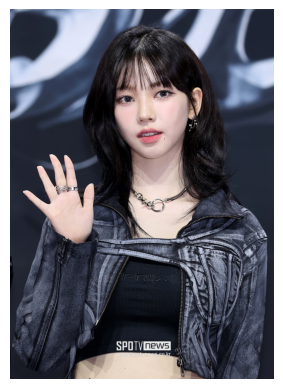

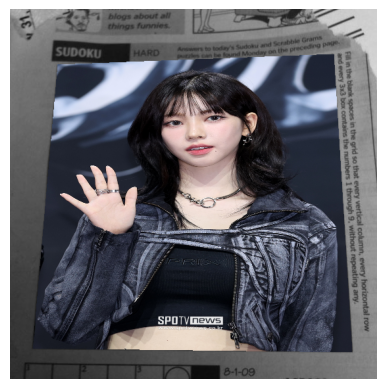

In [ ]:
# 카리나를 SudoKu 위에 합성

karina = cv2.imread('C:\\study\\openCV\\karina.jpg')[..., [2,1,0]]
plt.imshow(karina)
plt.axis('off')
plt.show()

H, W, _ = karina.shape

dstPoints = np.array([
        [0, 0],  # 좌상단
        [W, 0],  # 우상단
        [W, H],  # 우하단
        [0, H]   # 좌하단
]).astype(np.float32)

#(0,0) ──────── (W,0)
#  │                │
#  │   직사각형     │
#  │                │
#(0,H) ──────── (W,H)

#dstPoints = 결과 이미지의 4개 꼭짓점
#srcPoints = 원본 이미지의 4개 꼭짓점 (기울어진 좌표)

#srcPoints (기울어진 스도쿠 꼭짓점)
#        ↓  getPerspectiveTransform
#변환 행렬 M 계산
#        ↓  warpPerspective
#dstPoints (반듯한 직사각형)

mat = cv2.getPerspectiveTransform(dstPoints, srcPoints)
# 카리나 직사각형을 스도쿠 모양으로 찌그러뜨리는 행렬 생성

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)
dH, dW, _ = dst.shape
karina2 = cv2.warpPerspective(karina, mat, (dW, dH), borderMode=cv2.BORDER_TRANSPARENT, dst=dst)


#카리나 (직사각형)          스도쿠 배경
#  ┌──────────┐              ╱────╲
#  │          │    mat      ╱      ╲
#  │  karina  │  ──────►   ╱ karina ╲
#  │          │            ╲        ╱
#  └──────────┘             ╲ ──── ╱
#                          스도쿠 모양에 맞게 찌그러짐
#                          + 나머지는 스도쿠 배경 유지
#                              ↓
#                           karina2


plt.imshow(karina2)
plt.axis('off')
plt.show()

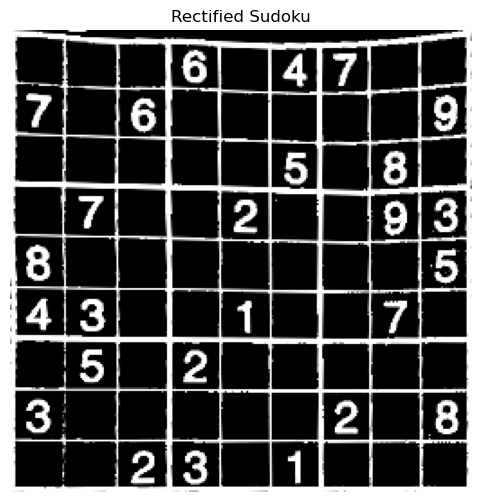

In [34]:
_, binary = cv2.threshold(fore, 15, 255, cv2.THRESH_BINARY)

dstPoints = np.array([[0, 0],
                      [255, 0],
                      [255, 255],
                      [0, 255]], np.float32)

M = cv2.getPerspectiveTransform(srcPoints, dstPoints)

rectified = cv2.warpPerspective(binary, M, (256, 256))

plt.figure(figsize=(6,6))
plt.imshow(rectified, cmap='gray')
plt.title("Rectified Sudoku")
plt.axis("off")
plt.show()


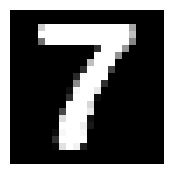

In [35]:
# template matching - pattern matching
temp = cv2.imread('seven.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(2,2))
plt.imshow(temp, cmap = 'gray')
plt.axis("off")
plt.show()

In [36]:
temp.shape

(22, 22)

In [37]:
res = cv2.matchTemplate(rectified // 255, temp // 255, cv2.TM_SQDIFF)
res.shape

(235, 235)

In [38]:
res.dtype

dtype('float32')

In [39]:
res.max()

np.float32(260.0)

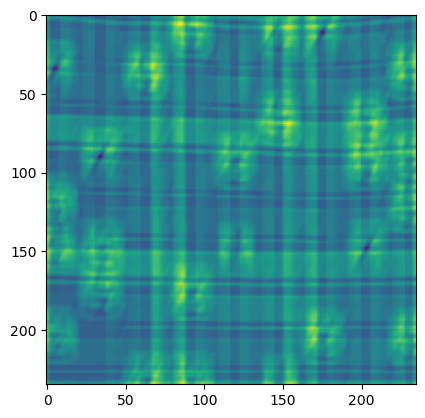

In [40]:
import matplotlib.pyplot as plt
plt.imshow(res)

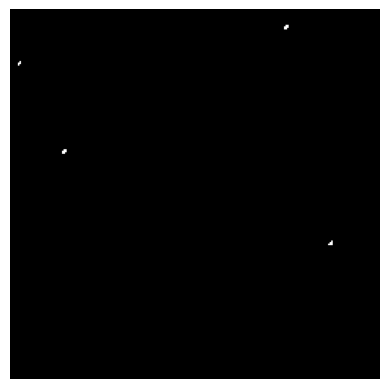

In [41]:
src2 = np.uint8(res < 50) * 255
plt.imshow(src2, cmap='gray')
plt.axis("off")
plt.show()

In [42]:
a = np.array([True, False, False, True, False])

np.where(a)[0]

# np.where(a)
# -> result : (array([0, 3]), ) 이렇게 출력 됨

# True인 요소의 인덱스를 반환 
# 0번째, 3번째

array([0, 3])

In [43]:
a = np.zeros((100, 100))
a[10, 20] = 1
a[50, 60] = 1
a[70, 30] = 1
a = a.astype(bool)

# 1 -> True (3개 위치)
# 0 -> False (나머지 전부)

np.where(a, 0, 255).astype(np.uint8)

# True (1) -> 0(검정)
# False (0) -> 255(흰색)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(100, 100), dtype=uint8)

In [44]:
a = np.arange(9).reshape(3, 3)

#a = [[ 0,  1,  2 ],    ← 0행
#     [ 3,  4,  5 ],    ← 1행
#     [ 6,  7,  8 ]]    ← 2행
#       ↑   ↑   ↑
#      0열  1열  2열


a[[1, 2, 0], [0, 1, 2]]


#순서	행(y)	열(x)	   위치	     값
#1번째	 1	     0	    (1행, 0열)	 3
#2번째	 2	     1	    (2행, 1열)	 7
#3번째	 0	     2	    (0행, 2열)	 2

array([3, 7, 2])

In [47]:
# SudoKu에서 특정 밝기 이하의 픽셀의 위치와 값을 한꺼번에 관리하기 위함.

y, x = np.where(res < 50)
# result : (array([행들,,,]), array([열들,,,,]))  ← 튜플 2개
# 튜플을 언패킹해서 y, x에 나눠 담음


v = res[res < 50] 
# res[y, x] 동일 결과

points = list(zip(v, x, y))

# v = [v1, v2, v3 ....]
# x = [x1, x2, x3 ....]
# y = [y1, y2, y3 ....]
# 값, x좌표, y좌표를 묶어서 리스트로 만듦

# zip -> [(v1, x1, y1), (v2, x2, y2), (v3, x3, y3) ...]

np.array(points).shape

(24, 3)

In [ ]:
(3, 3) < (2, 4)
# ↑       ↑
# 3   vs  2   →  3 > 2  이므로  False  (뒤는 보지 않음)

False

In [ ]:
a = [1, 2, 3]
b = [4, 5, 6]
c = a, b
# 튜플 패킹
# = ([1,2,3], [4,5,6]) 튜플로 묶임


list(zip(*c))
# 튜플 언패킹
# [1, 2, 3]
# [4, 5, 6]
#  ↓  ↓  ↓
# (1,4)(2,5)(3,6)

# list(...) -> 최종결과
# [(1, 4), (2, 5), (3, 6)]

[(1, 4), (2, 5), (3, 6)]

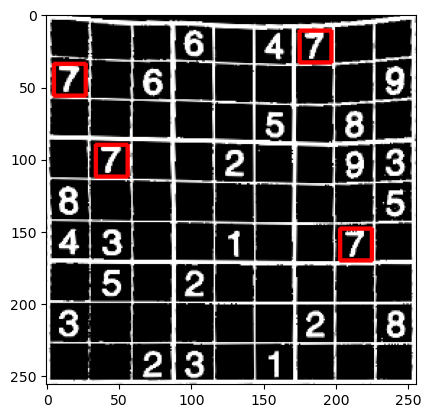

In [ ]:
y, x = np.where(res < 50)
v = res[y, x]

points = [np.array([ax, ay]) for av, ax, ay in sorted(points)]
# 튜플 (v, x, y)기준으로 v(밝기) 오름차순 정렬
# -> 어두운 픽셀부터 순서대로 [x, y] 배열 리스트 생성


# points = []
# for av, ax, ay in sorted(zip(v, x, y)):
#     point = np.array([ax, ay])
#     points.append(point)


# 근접 중복 제거 1.
selected = []
for p in points:
    dup = False
    for s in selected:
        if sum((p - s) ** 2) < 20: 
            dup = True
            break
    if not dup:
        selected.append(p)


# 근접 중복 제거 2. (동일)
selected = []
for p in points:
    for s in selected:
        if sum((p - s) ** 2) < 20:
            break
    else:
        selected.append(p)

                                                                                                                                                        
dst = cv2.cvtColor(rectified, cv2.COLOR_GRAY2BGR)
for s in selected:
    p1 = tuple(s)
    p2 = tuple(s + 22)
    cv2.rectangle(dst, p1, p2, (255, 0, 0), 2)

plt.imshow(dst)